In [77]:
import pandas as pd

df = pd.read_csv('kc_house_data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 1.2 Изучите стоимости недвижимости

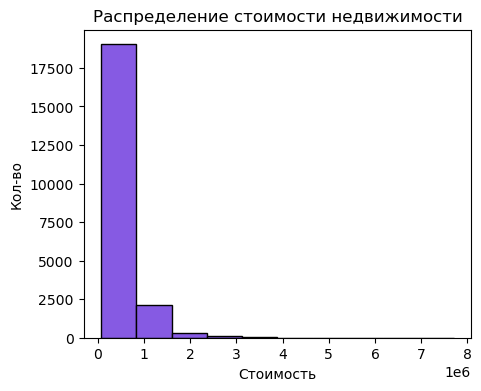

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.hist(df['price'], edgecolor='black', color='#865AE3')
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во');

Чем ниже стоимость недвижимости, тем ее больше.

#### 1.3 Изучите распределение квадратуры жилой площади

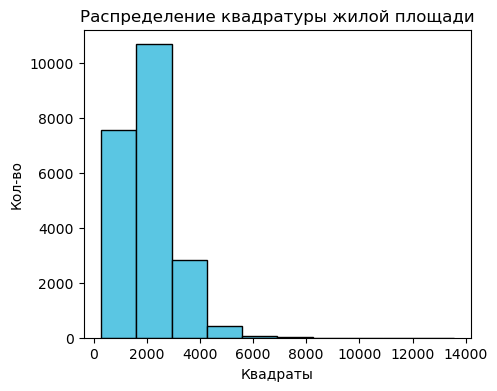

In [79]:
plt.figure(figsize=(5,4))
plt.hist(df['sqft_living'], edgecolor='black', color='#5AC6E3')
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Квадраты')
plt.ylabel('Кол-во');

Больше всего домов находится в диапазоне между 1500 кв футов и 3000 кв футов.

#### 1.4 Изучите распределение года постройки

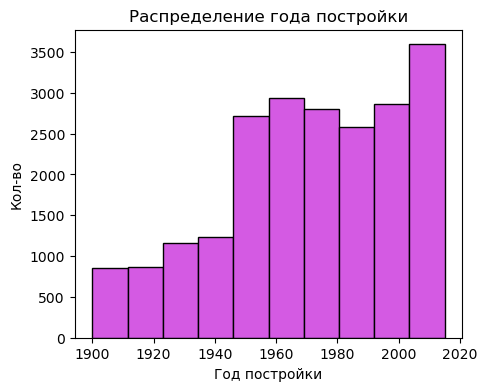

In [80]:
plt.figure(figsize=(5,4))
plt.hist(df['yr_built'], edgecolor='black', color='#D45AE3')
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во');

Большинство домов были построены в период с 1945 по 2020.

#### 2.1 Изучите распределение домов от наличия вида на набережную

In [81]:
data = df['waterfront'].value_counts()
data

waterfront
0    21450
1      163
Name: count, dtype: int64

In [82]:
names = data.index
values = data.values

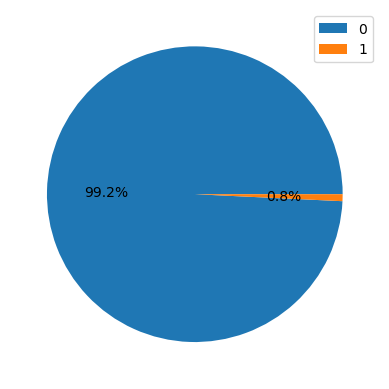

In [83]:
plt.pie(values, autopct='%.1f%%');
plt.legend(names)

Большее кол-во домов не имеет вида на набережную.

#### 2.2 Изучите распределение этажей домов

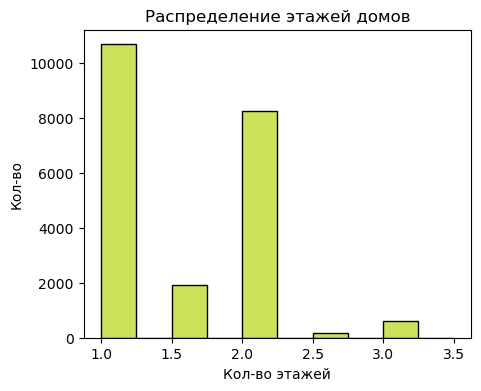

In [84]:
plt.figure(figsize=(5,4))
plt.hist(df['floors'], edgecolor='black', color='#CAE35A')
plt.title('Распределение этажей домов')
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во');

Подавляющее большинство домов имеют 1 или 2 этажа.

#### 2.3 Изучите распределение состояния домов

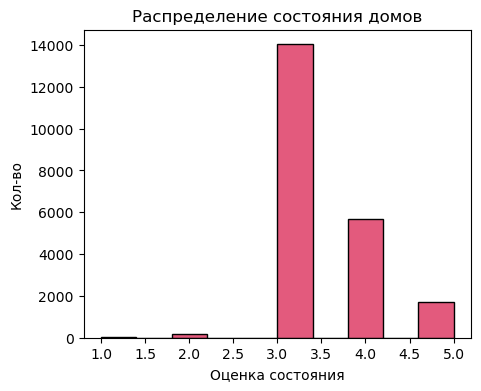

In [85]:
plt.figure(figsize=(5,4))
plt.hist(df['condition'], edgecolor='black', color='#E35A7D')
plt.title('Распределение состояния домов')
plt.xlabel('Оценка состояния')
plt.ylabel('Кол-во');

Состояние большинства домов оценивается как среднее.

#### Задание 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

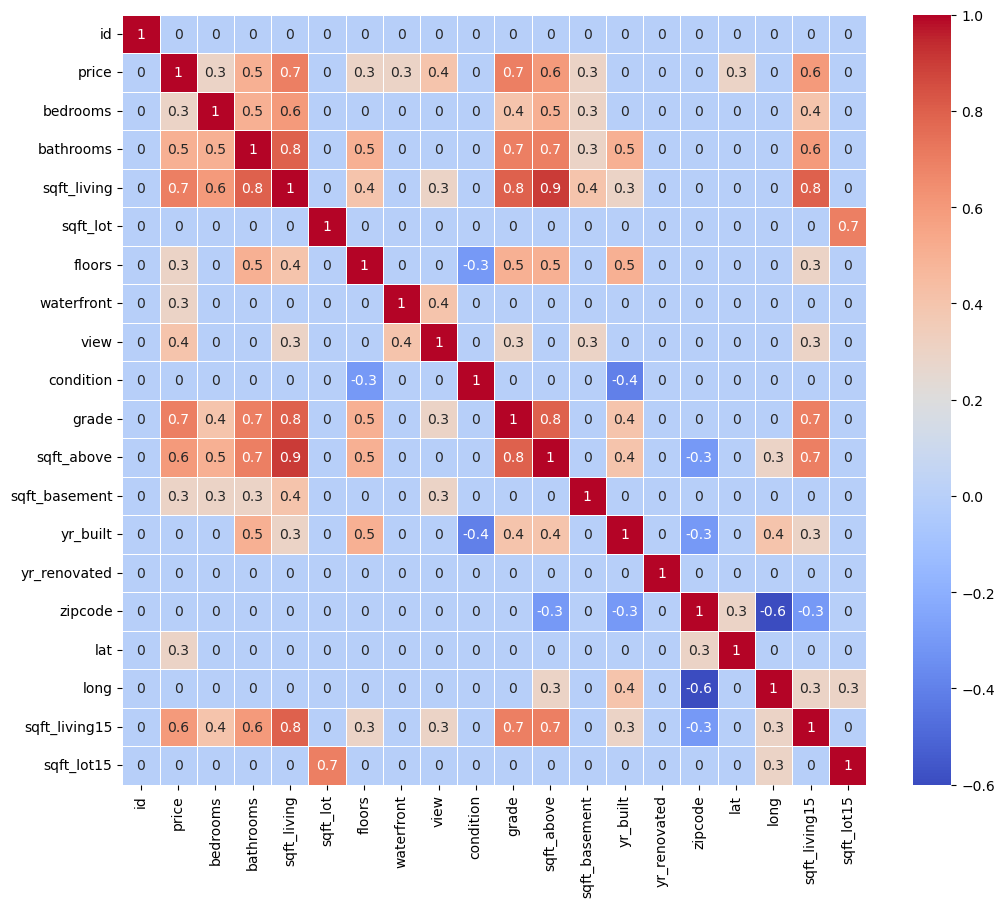

In [86]:
import numpy as np
import seaborn as sns

numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

Можно заметить, что такие характеристики недвижимости как кол-во ванных комнат, кв. футы жилые, уровень конструкции здания и дизайн и кв. футы дома, которые находятся выше земли, имеют сильную положительную корреляцию со стоимостью недвижимости. Соответственно, чем выше эти показатели, тем выше стоимость недвижимости.

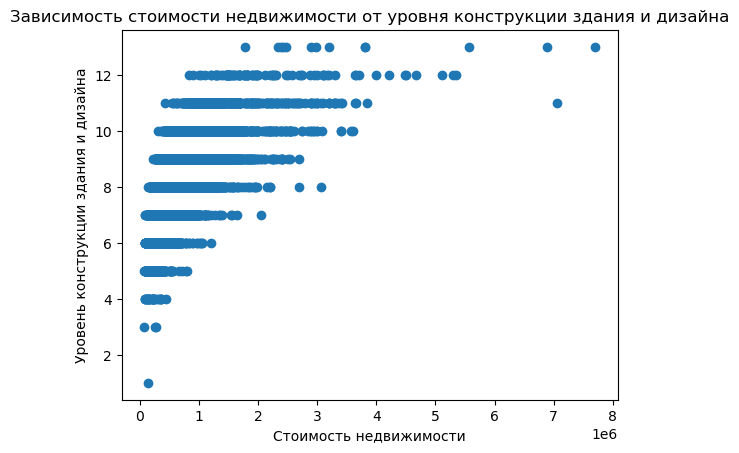

In [87]:
plt.scatter(df['price'], df['grade'])
plt.title('Зависимость стоимости недвижимости от уровня конструкции здания и дизайна')
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Уровень конструкции здания и дизайна');

Стоимость недвижимости растет с ростом уровня конструкции здания и дизайна.

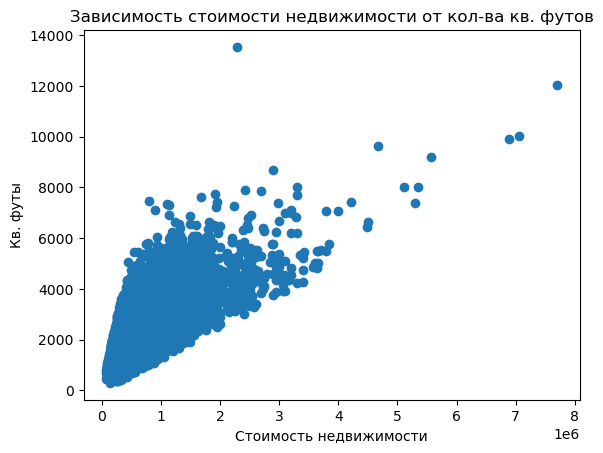

In [88]:
plt.scatter(df['price'], df['sqft_living'])
plt.title('Зависимость стоимости недвижимости от кол-ва кв. футов')
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Кв. футы');

Стоимость недвижимости растет с ростом площади дома.

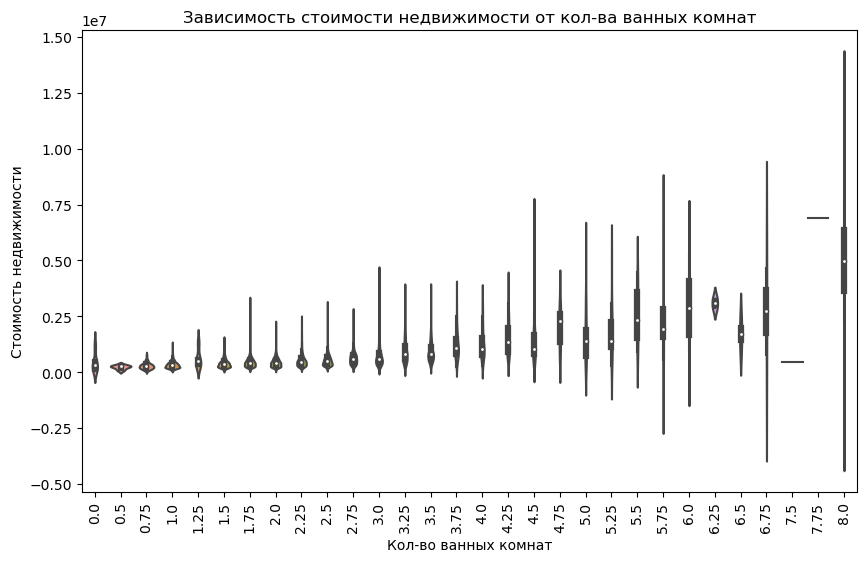

In [100]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['bathrooms'], y=df['price'])
plt.title('Зависимость стоимости недвижимости от кол-ва ванных комнат')
plt.xlabel('Кол-во ванных комнат')
plt.ylabel('Стоимость недвижимости')
plt.xticks(rotation=90);

Стоимость недвижимости растет с ростом кол-ва ванных комнат.

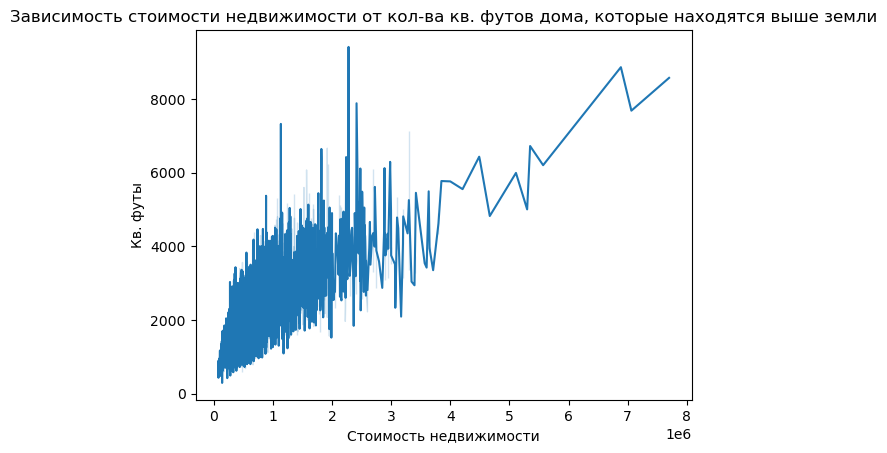

In [102]:
sns.lineplot(x=df['price'], y=df['sqft_above'])
plt.title('Зависимость стоимости недвижимости от кол-ва кв. футов дома, которые находятся выше земли')
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Кв. футы');

Стоимость недвижимости растет с ростом площади дома, находящейся выше земли.